# **Heart Failure Prediction**
Project by Francisco Uriel Olivas Márquez

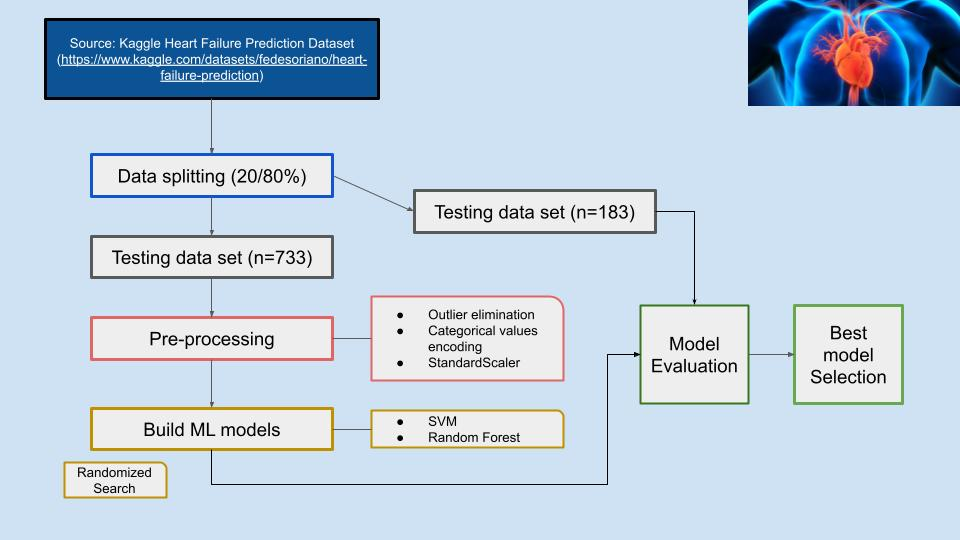

Heart Failure Prediction using Machine Learning. Implemented in Python using a public dataset from Kaggle.

In [ ]:
"""! git clone https://github.com/Francisco-Olivas/Heart-Failure-Prediction.git
!git config --global user.email "franc.olivasm@gmail.com"
!git config --global user.name "Francisco-Olivas"

from getpass import getpass
token = getpass("Token: ")
!git remote set-url origin https://{token}@github.com/usuario/repositorio.git
%cd Heart-Failure-Prediction
!git status"""

'! git clone https://github.com/Francisco-Olivas/Heart-Failure-Prediction.git\n!git config --global user.email "franc.olivasm@gmail.com"\n!git config --global user.name "Francisco-Olivas"\n\nfrom getpass import getpass\ntoken = getpass("Token: ")\n!git remote set-url origin https://{token}@github.com/usuario/repositorio.git\n%cd Heart-Failure-Prediction\n!git status'

In [ ]:
## 1. EXPLORATORY DATA ANALYSIS ##
import pandas as pd
import plotly.express as px

data=pd.read_csv("heart.csv")
print("DATA HEAD \n", data.head())
print("___________________________________")
print("DATA INFO")
print(data.info())
print("___________________________________")
print("DATA DESCRIBE \n", data.describe())
print("___________________________________")
print("Duplicated data: ", data.duplicated().sum())
print("___________________________________")

datadrop=data.drop(columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1)
print(datadrop.corr())

# DATA VISUALIZATION
# Scatter Plots
fig = px.scatter(data, x='Age', y='MaxHR', title="Scatter Plot")
fig.show()
fig = px.scatter(data, x='HeartDisease', y='MaxHR', title="Scatter Plot")
fig.show()
fig = px.scatter(data, x='HeartDisease', y='Oldpeak', title="Scatter Plot")
fig.show()

#Box Plots
fig_box = px.box(data, y='Age', title="Age Box Plot")
fig_box.show()
fig_box = px.box(data, y='RestingBP', title="RestingBP Box Plot")
fig_box.show()
fig_box = px.box(data, y='Cholesterol', title="Cholesterol")
fig_box.show()
fig_box = px.box(data, y='Oldpeak', title="Oldpeak")
fig_box.show()

# Bar plots
counts = data['HeartDisease'].value_counts().reset_index()# Count category frequency
counts.columns = ['HeartDisease', 'Cantidad']
fig = px.bar(counts, x='HeartDisease', y='Cantidad', title="Amount of people with/without Heart Disease")
fig.show()

counts = data['Sex'].value_counts().reset_index()
counts.columns = ['Sex', 'Cantidad']
fig = px.bar(counts, x='Sex', y='Cantidad', title="Amount of people with/without Heart Disease")
fig.show()

# Outliers Elimination
data = data[data['RestingBP'] != 0]
data = data[data['Cholesterol'] != 0]
fig_box = px.box(data, y='RestingBP', title="RestingBP Box Plot")
fig_box.show()
fig_box = px.box(data, y='Cholesterol', title="Cholesterol")
fig_box.show()

DATA HEAD 
    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
___________________________________
DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  

In [ ]:
## 2. DATA DIVISION ##
from sklearn.model_selection import train_test_split
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
## 3. PREPROCESSING ##
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Transform Categorical Values
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
X_train = pd.get_dummies(X_train, columns=categorical_cols)
X_test = pd.get_dummies(X_test, columns=categorical_cols)

# Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [ ]:
## 4. MODEL TRAINING ##
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import uniform

# Hyperparameters
param_dist = {
    'C': uniform(loc=0.1, scale=10),
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'class_weight': ['balanced']
}

# Base Model
svm = SVC(probability=True, random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,                   # 5-fold cross-validation
    scoring='f1',           # F1-score
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Training
random_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bab5530f9d0>,
                                        'class_weight': ['balanced'],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid']},
                   random_state=42, scoring='f1', verbose=2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## 4b. RANDOM FOREST MODEL TRAINING ##

# Definir el modelo
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Parámetros para RandomizedSearchCV
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400, 500],  # cantidad de árboles
    'max_depth': [None, 10, 20, 30, 40, 50],   # profundidad máxima
    'min_samples_split': [2, 5, 10],            # mínimo samples para dividir
    'min_samples_leaf': [1, 2, 4],              # mínimo samples en hoja
    'bootstrap': [True, False]                   # usar bootstrap o no
}

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=20,
    cv=5,
    scoring='f1',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Entrenamiento
random_search_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='f1', verbose=2)

In [ ]:
#MODEL EVALUATION
# SVM Results
print("Best Parameters:", random_search.best_params_)
best_svm = random_search.best_estimator_
# Confusion Matrix and Classification Report
y_pred_best = best_svm.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

# Random Forest Results
print("Random Forest - Best Parameters:", random_search_rf.best_params_)
best_rf = random_search_rf.best_estimator_
# Confusion Matrix and Classification Report
y_pred_rf = best_rf.predict(X_test_scaled)
print("Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))


Best Parameters: {'C': np.float64(1.9182496720710063), 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
[[63 15]
 [ 6 66]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        78
           1       0.81      0.92      0.86        72

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.87      0.86      0.86       150

Random Forest - Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': True}
Random Forest - Confusion Matrix:
[[63 15]
 [ 8 64]]
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        78
           1       0.81      0.89      0.85        72

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85 

In [ ]:
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    labels = ['No HD', 'HD']
    fig = go.Figure(data=go.Heatmap(
        z=cm,
        x=labels,
        y=labels,
        hoverongaps=False,
        colorscale='Viridis',
        reversescale=True,
        text=cm,
        texttemplate="%{text}",
        textfont={"size":20}
    ))
    fig.update_layout(
        title=title,
        xaxis_title="Predicted Label",
        yaxis_title="True Label",
        yaxis_autorange='reversed',
        width=500,
        height=450,
        font=dict(size=16)
    )

    fig.show()

#SVM
plot_confusion_matrix(y_test, y_pred_best, "SVM Confusion Matrix")
#Random Forest
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")


In [209]:
!git commit --m "Minor fixes"
!git push origin main

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 2.24 KiB | 573.00 KiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/Francisco-Olivas/Heart-Failure-Prediction.git
   e1875fa..915d32f  main -> main


In [210]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
